# Introducing Neural Nets

This notebook:

- Classical perceptron
- Introduce the modern multilayer perceptron
- Introduce keras API
    - Introduce Sequential API


## The Basic Perceptron

- The original perceptron is based on the *threshold logic unit* (TLU) artifial neuron:

<img src="tlu.png" alt="TLU" style="width:325px;"/>

- Sum up inputs times weights, add bias term, and then apply threshold function:

$$
z = w_1 x_1 + ... + w_n x_n + b = \mathbf{w}^T \mathbf{x} + b
$$

Output is then:

$$
\phi(\mathbf{w}^T \mathbf{x} + b),
$$

where $\phi()$ is the threshold function.

A perceptron *per se* is composed of an input layer and and output layer of TLUs:

<img src="perceptron.png" alt="Wide and Deep Architecture" style="width:325px;"/>

Learning rule is ostensibly variation of Hebbian Learning, which proceeds one observation at a time:

$$
w_{i,j}^{\text{(next)}} = w_{i,j} + \eta (y_j - \hat{y}_j) x_i
$$

where:

- $w_{i,j}$ is connection weight from $i$th input to $j$ neuron
- $x_i$ is $i$th component of input (current training instance)
- $\hat{y}_j$ is output of $j$ neuron (current training instance)
- $y_j$ is target output of $j$ neuron (current training instance)
- $\eta$ is learning rate

- Each neuron has linear decision bounday
- Perceptrons are linear classifiers, like SVMs and Logistic Regression

Let's do a simple example:

In [2]:
##Once again a function to show decision contour/boundary:
##Function for contour:
def plot_contour(ax, X, clf, N=500):
    x1 = np.min(X[:,0]); x2 = np.max(X[:,0])
    y1 = np.min(X[:,1]); y2 = np.max(X[:,1])

    X1, Y1 = np.meshgrid(np.linspace(x1, x2, N),
                             np.linspace(y1, y2, N))

    #Get as Nx2:
    XY_ravel = np.c_[X1.ravel(), Y1.ravel()]

    y_pred_surface = clf.predict(XY_ravel)
    Z = y_pred_surface.reshape(X1.shape)


    ax.contourf(X1, Y1, Z, alpha=.5, cmap='jet')
    ax.contour(X1, Y1, Z, 20, alpha=1, linewidths=1, colors='black');

    

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

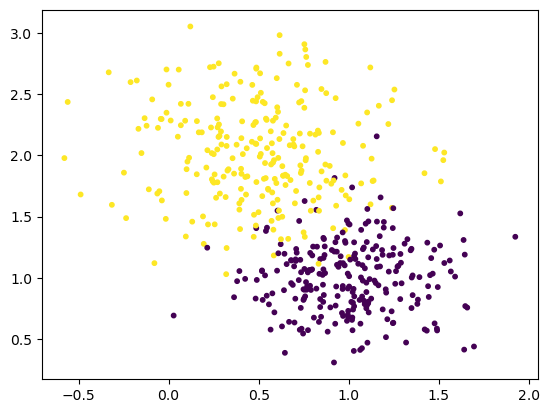

In [105]:
from sklearn.datasets import make_blobs

#Make two blobs and classify:
blob_centers = np.array([[1, 1], [.5, 2]])

blob_std = np.array([0.3, .4])

#X and y:
#y is blob membership
X, y = make_blobs(n_samples=500, centers=blob_centers, cluster_std=blob_std,
                  random_state=42)

plt.scatter(X[:,0], X[:,1], s=10, c=y)

In [106]:
### Try to classify using classical perceptron
####

from sklearn.linear_model import Perceptron

clf_per = Perceptron()

y = y.reshape(-1,1)
clf_per.fit(X, y)



C:\Users\steff\Anaconda3\envs\ML_environment\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron()

In [107]:
#Note some of the hyperparameters

clf_per.get_params()

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

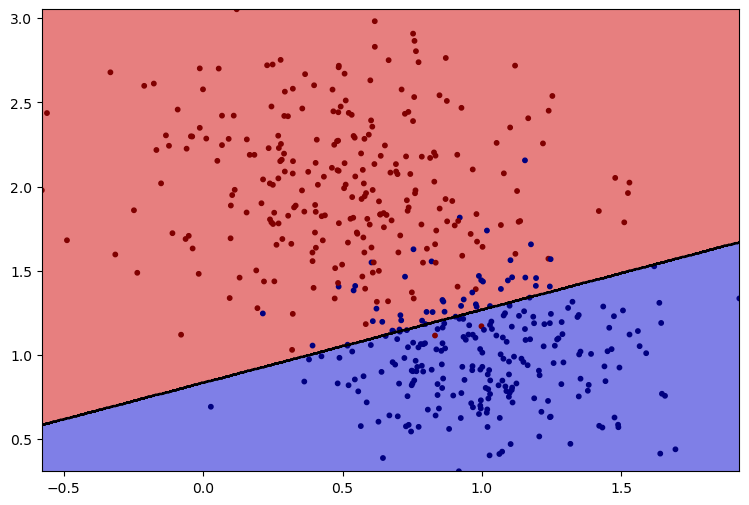

In [108]:
#We get a reasonable linear decision boundary:
#######

fig, ax1 = plt.subplots(1,1, figsize=(9,6))

plot_contour(ax1, X, clf_per)
ax1.scatter(X[:,0], X[:,1], s=10, c=y, cmap='jet');

In [109]:
## Do ourselves using learning rule?
#########

#Initialize weights at zero:
#Have one weight be the bias
w = np.zeros([3,1])
w

array([[0.],
       [0.],
       [0.]])

In [110]:
#Add a column of ones for the bias:
######

X_aug = np.c_[np.ones([500]), X]


In [111]:
#Run method a few times:
#######

def phi(x):
    return np.heaviside(x, 0)


#Learning rate:
eta = .001

## Keep running cell for a "warm start"
########

for index in range(10):
    
    #Iterate through each observation:
    
    #Predictions?
    y_pred = phi(X_aug.dot(w))
    
    #Iterate through all observations here
    #Alternatively, could just select a single observation for a stochastic version
    for obs in range(len(X)):
        
        #Iterate through each input:
        for i in range(3):
            
            #Update weight:
            w[i] = w[i] + eta * (y[obs] - y_pred[obs]) * X_aug[obs, i]
    
    print(w)

[[0.25      ]
 [0.12546053]
 [0.50590469]]
[[-4.85722573e-17]
 [-1.24734252e-01]
 [ 2.55073776e-01]]
[[-0.234     ]
 [-0.35327775]
 [ 0.01256955]]
[[ 0.016     ]
 [-0.22781722]
 [ 0.51847424]]
[[-0.223     ]
 [-0.46344837]
 [ 0.27282678]]
[[-0.14      ]
 [-0.39364252]
 [ 0.41843099]]
[[-0.203     ]
 [-0.44134135]
 [ 0.33834118]]
[[-0.182     ]
 [-0.41619368]
 [ 0.37346015]]
[[-0.188     ]
 [-0.41288712]
 [ 0.36784999]]
[[-0.193     ]
 [-0.40882513]
 [ 0.36357521]]


In [113]:
#Do stochastic version:
#######

def theta(x):
    return np.heaviside(x, 0)


#Learning rate:
eta = .001

#Iterate more times since we only use a single observation for training each loop
for index in range(1000):
    
    #Predictions?
    y_pred = theta(X_aug.dot(w))
        
    #Iterate through all observations here
    #Alternatively, could just select a single observation for a stochastic version
    obs = np.random.choice(len(X_aug))
            
    #Iterate through each input:
    for i in range(3):

        #Update weight:
        w[i] = w[i] + eta * (y[obs] - y_pred[obs]) * X_aug[obs, i]

    #print(w)

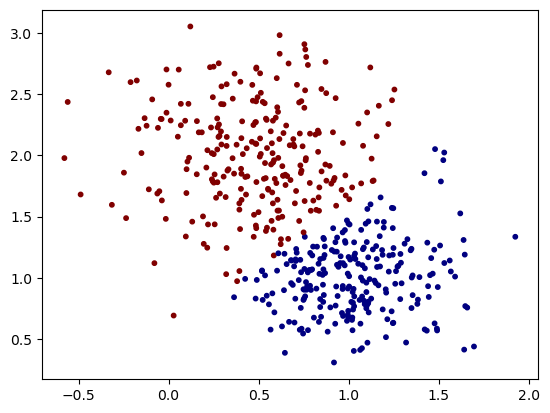

In [116]:
plt.scatter(X[:,0], X[:,1], s=10, c=y_pred, cmap='jet');

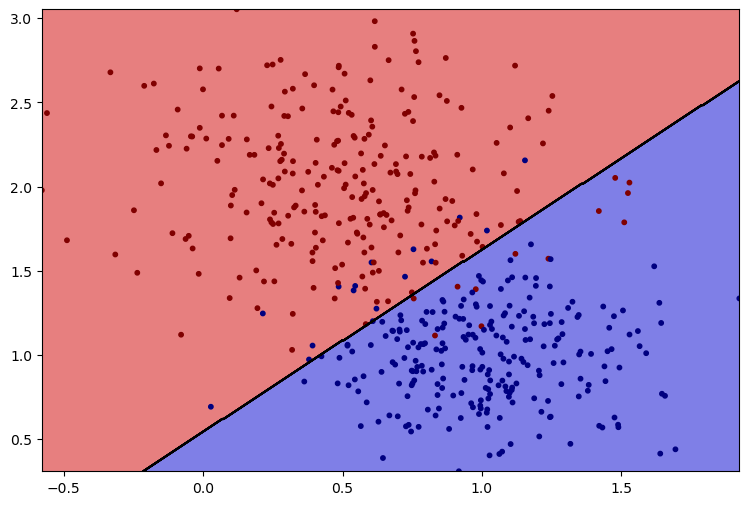

In [118]:
#Make a decision surface:
#######

fig, ax1 = plt.subplots(1,1, figsize=(9,6))

x1 = np.min(X[:,0]); x2 = np.max(X[:,0])
y1 = np.min(X[:,1]); y2 = np.max(X[:,1])

N = 500
X1, Y1 = np.meshgrid(np.linspace(x1, x2, N),
                         np.linspace(y1, y2, N))

#Get as Nx2:
XY_ravel = np.c_[np.ones([N*N]), X1.ravel(), Y1.ravel()]

y_pred_surface = phi(XY_ravel.dot(w))
Z = y_pred_surface.reshape(X1.shape)


#How'd we do?
#####

ax1.contourf(X1, Y1, Z, alpha=.5, cmap='jet')
ax1.contour(X1, Y1, Z, 20, alpha=1, linewidths=1, colors='black');

ax1.scatter(X[:,0], X[:,1], s=10, c=y, cmap='jet');

#### Note can also use `SGDClassifier` with:

- `loss = "perceptron"`
- `learning_rate = "constant"`
- `eta0 = 1`
- `penalty = None` (no regularization)

### XOR and Perceptron?

- Cannot implement with single layer perceptron
- *Can* with a multi-layer perceptron

<img src="perceptron_xor.png" alt="Wide and Deep Architecture" style="width:400px;"/>


## Multilayer Perceptrons in Scikit-Learn; Backpropagation

- Backpropagation = chain rule + gradient descent for traing/updating weights
- Threshold activation function no good: Use sigmoid (logistic unit) or other
- The modern multilayer perceptron architecture:

<img src="mlp.png" alt="Multi-Layer Perceptron" style="width:375px;"/>


## MLP Regression

- We can do a standard regression problem with an arbitrary hidden architecture and a single output neuron
- Output of neuron is predicted value
- Can also do multivariate regression with multiple output neurons: One neuron for each predicted value (.e.g., latitude/longitude)

Start with very simple example on synthetic data:

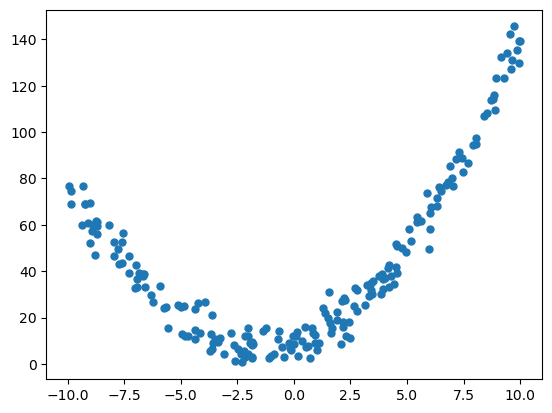

In [120]:
#Some synthetic data
N = 200

#Random points between -10 and 10, sorted:
x = np.random.uniform(-10, 10, N)
x.sort()

#Polynomial equation:
y = 3*x + x**2 + 10 + np.random.normal(loc=0, scale=5, size=N)

#Plot our data:
plt.plot(x, y, 'o', markersize=5);

In [122]:
#Convert to DataFrames:
#######

X = pd.DataFrame({'x':x})
y = pd.DataFrame({'y':y})

In [123]:
#Get some libraries, etc., do the good ole test/train split:
###

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [124]:
#Note: We need to set max_iter high, or else will underfit (can overfit if too high!)
#Even a couple neurons can give good result if you train long enough
#Try logistic vs. relu for activation
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 10], random_state=42, activation='relu', max_iter=10000,
                       warm_start=False) #Can switch to true as below

#Can try with and without StandardScaler
pipeline = make_pipeline(StandardScaler(), mlp_reg)
#pipeline = make_pipeline(mlp_reg)

pipeline.fit(X_train, y_train)


C:\Users\steff\Anaconda3\envs\ML_environment\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=[50, 10], max_iter=10000,
                              random_state=42))])

In [125]:
#Sort X_test
X_test = X_test.sort_values(by='x')


In [126]:
## And sort y to corresponding indices
y_test = y_test.loc[X_test.index]

In [127]:
#Get predictions on test data?

y_pred = pipeline.predict(X_test)


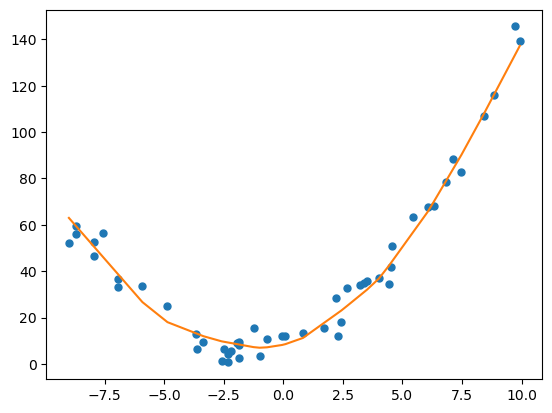

In [128]:
##Plot Predictions on test data?
plt.plot(X_test, y_test, 'o', markersize=5)
plt.plot(X_test, y_pred);


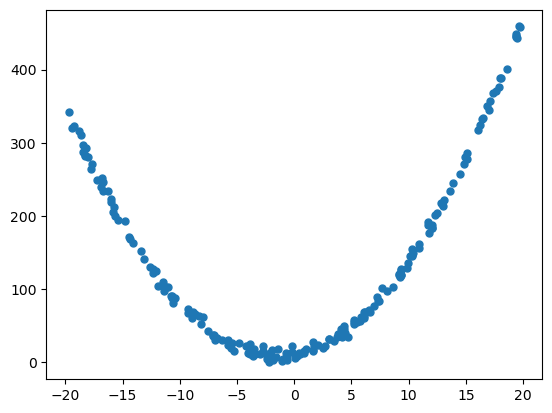

In [129]:
#Make data outside training range?
#Random points between -20 and 20, sorted:
x = np.random.uniform(-20, 20, N)
x.sort()

#Linear equation:
y = 3*x + x**2 + 10 + np.random.normal(loc=0, scale=5, size=N)

#Plot our data:
plt.plot(x, y, 'o', markersize=5);


In [130]:
#Convert to DataFrames:
#######

X_new = pd.DataFrame({'x':x})
y_new = pd.DataFrame({'y':y})

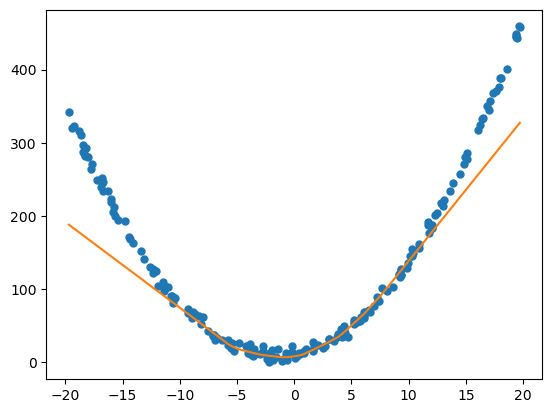

In [131]:
#Predict and plot:
y_pred = pipeline.predict(X_new)

##Plot Predictions on test data?
plt.plot(X_new, y_new, 'o', markersize=5)
plt.plot(X_new, y_pred);


## Try with Keras

- Let's build a simple regressor using the sequential API:

In [6]:
import tensorflow as tf

In [147]:
#Set our random seed:
tf.random.set_seed(42)

#Initialize the model:
model = tf.keras.Sequential()

In [148]:
## Add some layers: First we need an input layer:
model.add(tf.keras.layers.Input(shape=[1]))

In [149]:
## Now let's add several dense layers, i.e. fully connected feed forward neuronal layers:
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))

#Add a final Dense layer with just 1 neuron; no activation function
model.add(tf.keras.layers.Dense(1))

In [150]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 50)                100       
                                                                 
 dense_26 (Dense)            (None, 10)                510       
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 621 (2.43 KB)
Trainable params: 621 (2.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [151]:
##Now let's compile
##Set loss function and optimizer:

model.compile(loss="mse", optimizer="Adam")

In [154]:
#Try 10 vs. 100 vs. 1000 epochs
model.fit(X_train, y_train, epochs=1000) #, batch_size=32)

Epoch 1/1000
5/5 [==============================] - 0s 1ms/step - loss: 1709.6296
Epoch 2/1000
5/5 [==============================] - 0s 1000us/step - loss: 1626.1003
Epoch 3/1000
5/5 [==============================] - 0s 1ms/step - loss: 1529.9868
Epoch 4/1000
5/5 [==============================] - 0s 1ms/step - loss: 1434.4851
Epoch 5/1000
5/5 [==============================] - 0s 1ms/step - loss: 1347.2794
Epoch 6/1000
5/5 [==============================] - 0s 1ms/step - loss: 1257.7758
Epoch 7/1000
5/5 [==============================] - 0s 1ms/step - loss: 1166.3079
Epoch 8/1000
5/5 [==============================] - 0s 1ms/step - loss: 1088.0862
Epoch 9/1000
5/5 [==============================] - 0s 1ms/step - loss: 1000.6740
Epoch 10/1000
5/5 [==============================] - 0s 1ms/step - loss: 918.8697
Epoch 11/1000
5/5 [==============================] - 0s 1ms/step - loss: 840.0792
Epoch 12/1000
5/5 [==============================] - 0s 1ms/step - loss: 767.2342
Epoch 13/1000

Epoch 199/1000
5/5 [==============================] - 0s 1ms/step - loss: 81.2861
Epoch 200/1000
5/5 [==============================] - 0s 1ms/step - loss: 81.1956
Epoch 201/1000
5/5 [==============================] - 0s 1ms/step - loss: 80.9700
Epoch 202/1000
5/5 [==============================] - 0s 1ms/step - loss: 80.8447
Epoch 203/1000
5/5 [==============================] - 0s 1ms/step - loss: 80.3486
Epoch 204/1000
5/5 [==============================] - 0s 1ms/step - loss: 80.1664
Epoch 205/1000
5/5 [==============================] - 0s 1ms/step - loss: 79.8736
Epoch 206/1000
5/5 [==============================] - 0s 1000us/step - loss: 79.6595
Epoch 207/1000
5/5 [==============================] - 0s 1ms/step - loss: 79.3762
Epoch 208/1000
5/5 [==============================] - 0s 1ms/step - loss: 79.2843
Epoch 209/1000
5/5 [==============================] - 0s 1ms/step - loss: 79.0233
Epoch 210/1000
5/5 [==============================] - 0s 1000us/step - loss: 78.7749
Epoch 211/

5/5 [==============================] - 0s 1ms/step - loss: 45.8125
Epoch 398/1000
5/5 [==============================] - 0s 1ms/step - loss: 45.7911
Epoch 399/1000
5/5 [==============================] - 0s 1ms/step - loss: 45.6172
Epoch 400/1000
5/5 [==============================] - 0s 1000us/step - loss: 45.4241
Epoch 401/1000
5/5 [==============================] - 0s 1000us/step - loss: 45.3351
Epoch 402/1000
5/5 [==============================] - 0s 1ms/step - loss: 45.2833
Epoch 403/1000
5/5 [==============================] - 0s 1ms/step - loss: 45.1330
Epoch 404/1000
5/5 [==============================] - 0s 1ms/step - loss: 45.0133
Epoch 405/1000
5/5 [==============================] - 0s 1ms/step - loss: 44.9104
Epoch 406/1000
5/5 [==============================] - 0s 1ms/step - loss: 44.6940
Epoch 407/1000
5/5 [==============================] - 0s 1ms/step - loss: 44.5884
Epoch 408/1000
5/5 [==============================] - 0s 1ms/step - loss: 44.4849
Epoch 409/1000
5/5 [=====

5/5 [==============================] - 0s 1ms/step - loss: 33.3331
Epoch 596/1000
5/5 [==============================] - 0s 1ms/step - loss: 33.3793
Epoch 597/1000
5/5 [==============================] - 0s 1ms/step - loss: 33.3493
Epoch 598/1000
5/5 [==============================] - 0s 1ms/step - loss: 33.4020
Epoch 599/1000
5/5 [==============================] - 0s 1ms/step - loss: 33.3991
Epoch 600/1000
5/5 [==============================] - 0s 1ms/step - loss: 33.3257
Epoch 601/1000
5/5 [==============================] - 0s 1ms/step - loss: 33.4086
Epoch 602/1000
5/5 [==============================] - 0s 1ms/step - loss: 33.4219
Epoch 603/1000
5/5 [==============================] - 0s 1ms/step - loss: 33.3032
Epoch 604/1000
5/5 [==============================] - 0s 1ms/step - loss: 33.1948
Epoch 605/1000
5/5 [==============================] - 0s 1ms/step - loss: 33.3531
Epoch 606/1000
5/5 [==============================] - 0s 1ms/step - loss: 33.1380
Epoch 607/1000
5/5 [===========

5/5 [==============================] - 0s 1ms/step - loss: 30.8492
Epoch 794/1000
5/5 [==============================] - 0s 1ms/step - loss: 30.8137
Epoch 795/1000
5/5 [==============================] - 0s 1ms/step - loss: 30.8107
Epoch 796/1000
5/5 [==============================] - 0s 1000us/step - loss: 30.8275
Epoch 797/1000
5/5 [==============================] - 0s 1ms/step - loss: 30.8945
Epoch 798/1000
5/5 [==============================] - 0s 1ms/step - loss: 30.7442
Epoch 799/1000
5/5 [==============================] - 0s 1ms/step - loss: 30.8342
Epoch 800/1000
5/5 [==============================] - 0s 1ms/step - loss: 30.8041
Epoch 801/1000
5/5 [==============================] - 0s 1ms/step - loss: 30.8299
Epoch 802/1000
5/5 [==============================] - 0s 1ms/step - loss: 30.8018
Epoch 803/1000
5/5 [==============================] - 0s 1ms/step - loss: 30.8939
Epoch 804/1000
5/5 [==============================] - 0s 1ms/step - loss: 30.7795
Epoch 805/1000
5/5 [========

5/5 [==============================] - 0s 1ms/step - loss: 29.5902
Epoch 992/1000
5/5 [==============================] - 0s 1ms/step - loss: 29.7378
Epoch 993/1000
5/5 [==============================] - 0s 1ms/step - loss: 29.7488
Epoch 994/1000
5/5 [==============================] - 0s 1ms/step - loss: 29.5792
Epoch 995/1000
5/5 [==============================] - 0s 1ms/step - loss: 29.8045
Epoch 996/1000
5/5 [==============================] - 0s 1ms/step - loss: 29.5915
Epoch 997/1000
5/5 [==============================] - 0s 1ms/step - loss: 29.6143
Epoch 998/1000
5/5 [==============================] - 0s 1ms/step - loss: 29.6869
Epoch 999/1000
5/5 [==============================] - 0s 1ms/step - loss: 29.6428
Epoch 1000/1000
5/5 [==============================] - 0s 1ms/step - loss: 29.6693


In [155]:
## Now, predict:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


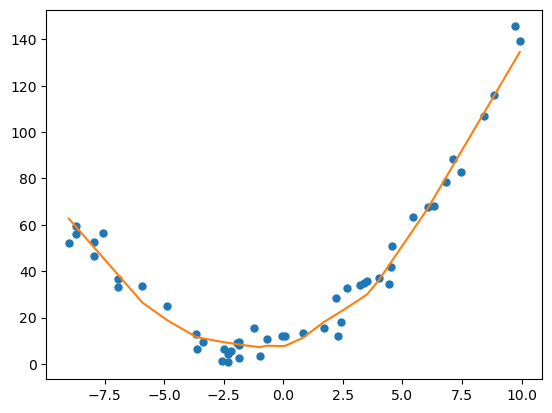

In [156]:
##Results?
plt.plot(X_test, y_test, 'o', markersize=5)
plt.plot(X_test, y_pred);


7/7 [==============================] - 0s 667us/step


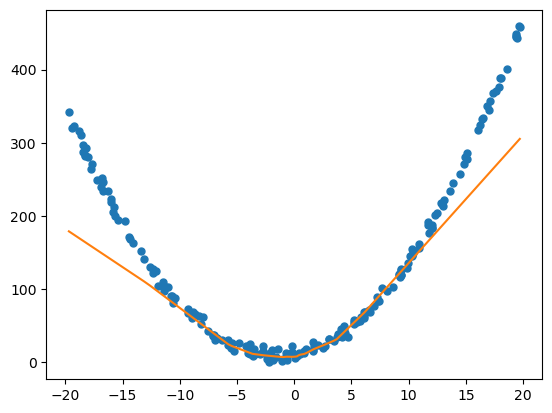

In [157]:
#Predict on data outside training range again:
y_pred = model.predict(X_new)

##Plot Predictions on test data?
plt.plot(X_new, y_new, 'o', markersize=5)
plt.plot(X_new, y_pred);

## Let's Use Keras Sequential API for Classification

- Now let us classify the good ole' MNIST Numbers

- We'll look a little closer at the model details here

In [13]:
#Load as usual:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [14]:
## This time let's hold out some of the training data for validation:
######

## All but last 5,000 will be train data; last 5,000 will be validation
X_train, y_train = train_images[:-5000], train_labels[:-5000]

X_valid, y_valid = train_images[-5000:], train_labels[-5000:]

#Rename the test data for consistency:
X_test, y_test = test_images, test_labels

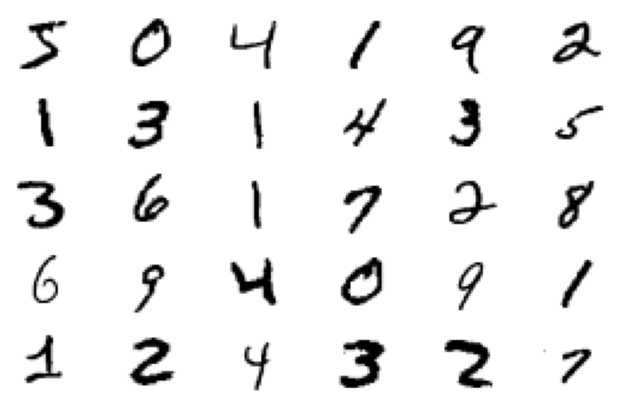

In [15]:
#Remind ourselves again what these look like:
#######

fig1, ax1 = plt.subplots(5, 6, figsize=(8,5))

#Flatten for easier indexing
ax1 = ax1.flatten()

#And plot:
for i in range(30):

    im = ax1[i].imshow(X_train[i], cmap='gray_r')
    ax1[i].set_axis_off()
    

In [16]:
## Also note some of the structure of the data:
########

X_train.shape

(55000, 28, 28)

In [17]:
#We have an integer between 0 and 255:
X_train.dtype

dtype('uint8')

In [18]:
#For keras, we'll want floats between 0 and 1:
#####
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [19]:
#Now, build the model using the sequential API:

#Can use this line to reset name counter:
#tf.keras.backend.clear_session()

tf.random.set_seed(42)

model = tf.keras.Sequential()

#Note our input comes in 28x28
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
#So we add a layer to flatten:
model.add(tf.keras.layers.Flatten())

#Let's add some hidden layers:
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))

#Output layer will have 10 neurons for 10 classes
#Activation function softmax
#Recall this is what we use for multinomial regression as well
model.add(tf.keras.layers.Dense(10, activation="softmax"))



In [170]:
#What did we get?
#Note the name: uncomment tf.keras.backend.clear_session() above before proceeding
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### How did we get the Param \#s above?

- $784 \times 300 + 300 = 235500$; i.e. input weights plus bias terms
- $300 \times 100 + 100 = 30100$
- $100 \times 10 + 10 = 1010$

This is a lot of trainable parameters!

#### We can examine individual layers:

- Each layer must have a unique name across models
- Can access using `layers` attribute or `get_layer()`

In [171]:
#Behold the layers!
model.layers

In [172]:
#Names of these fellows?
[i.name for i in model.layers]

['flatten', 'dense', 'dense_1', 'dense_2']

In [173]:
#Get a reference to a layer like so:
hidden1 = model.layers[1]

hidden1

In [174]:
hidden1.name

'dense'

In [175]:
#Can also get a reference to one of the layers in memory using get_layer():
model.get_layer('dense')

#### Examine and change layer weights, biases:

- `get_weights()`
- `set_weights()`

In [176]:
weights, biases = hidden1.get_weights()
weights

array([[-0.00482587, -0.03057075,  0.05381872, ...,  0.06307952,
         0.04699939,  0.0315969 ],
       [ 0.03661765, -0.03654778, -0.00803557, ...,  0.01590803,
         0.04109797,  0.04820755],
       [ 0.04141881, -0.06139233,  0.00171353, ...,  0.01073701,
         0.02736297, -0.01632567],
       ...,
       [ 0.00344229,  0.04847686, -0.05163425, ..., -0.03334837,
         0.00353191,  0.06632949],
       [ 0.03451914, -0.01339385,  0.02951529, ...,  0.0493345 ,
         0.02235042,  0.02685433],
       [ 0.02638007,  0.02527447,  0.05748574, ..., -0.03109866,
         0.05448455,  0.04002745]], dtype=float32)

In [177]:
weights.shape

(784, 300)

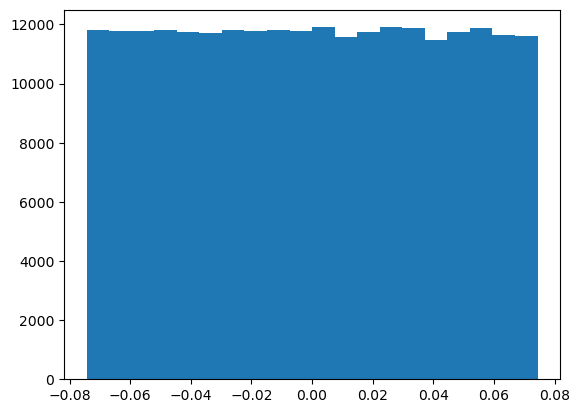

In [178]:
## Note distribution:
####

#Apears to be uniform
plt.hist(weights.flatten(), bins=20);

In [179]:
## We'll see later that the default initialization scheme is uniform weights
## With the following formula:
## fan_avg = average of number of inputs and outputs to layer
## Choose weights from uniform distribution between -r and +r, r = sqrt(3/fan)
## Can confirm:

fan_avg = (784+300) / 2
np.sqrt(3/(fan_avg))

0.07439795259651642

In [180]:
#Compare to max/min?
weights.max()
weights.min()

-0.07439717

In [181]:
#Biases initialized to?
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

#### Compile the model

- Must compile to set the loss function and optimizer for the model.

Loss function:

- Use `sparse_categorical_crossentropy` for sparse categorical labels, e.g. 0, 1, 2, ..., 9
- Use `categorical_crossentropy` if used one-hot encoding for labels, e.g. [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] for 2
- Use `binary_crossentropy` for binary classification (plus `sigmoid` instead of `softmax` for activation function of final layer)

Optimizer:

- Many options, we start with `sgd` here, for a nice classical stochastic gradient descent

Metric:

- Metrics to help us evaluate the model (doesn't affect training). `accuracy` is appropriate for a classifier

In [183]:
#Compile:

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [184]:
## Note we could be more verbose:

#model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
#              optimizer=tf.keras.optimizers.SGD(),
#              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

#### Training? Use `fit()` once again

- Pass training data
- Number of training epochs
- Keras uses mini-batch training with batch size 32 by default
- A training set of size 55,000 and batch size 32 yields 1,719 mini-batches per epoch (1,718 of size 32; 1 of size 24)
- Can optionally include validation set in training
    - Use `validation_data=` for explicit validation set
    - Or `validation_split=` for fraction of training data to be held back for validation

In [185]:
## Give it a try:
## Note the output as we run
history = model.fit(X_train, y_train, epochs=20,
          validation_data=(X_valid,y_valid))

Epoch 1/20
1719/1719 [==============================] - 3s 1ms/step - loss: 0.6125 - accuracy: 0.8437 - val_loss: 0.2542 - val_accuracy: 0.9320
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2870 - accuracy: 0.9185 - val_loss: 0.2054 - val_accuracy: 0.9420
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2343 - accuracy: 0.9339 - val_loss: 0.1697 - val_accuracy: 0.9526
Epoch 4/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1999 - accuracy: 0.9433 - val_loss: 0.1502 - val_accuracy: 0.9606
Epoch 5/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1738 - accuracy: 0.9505 - val_loss: 0.1335 - val_accuracy: 0.9648
Epoch 6/20
1719/1719 [==============================] - 3s 1ms/step - loss: 0.1545 - accuracy: 0.9561 - val_loss: 0.1261 - val_accuracy: 0.9654
Epoch 7/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1382 - accuracy: 0.9610 - val_loss: 0.1127 - val_accuracy:

In [186]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_supports_tf_logs',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [187]:
## Can exmine our history:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 1719}

In [188]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [189]:
#Dictionary of loss, accuracy, validation loss/accuracy by epoch:
######

history.history

{'loss': [0.6125264167785645,
  0.2870030999183655,
  0.2342699021100998,
  0.1998988687992096,
  0.17384952306747437,
  0.1544707715511322,
  0.13816414773464203,
  0.12468107044696808,
  0.11428467929363251,
  0.10391709208488464,
  0.09582414478063583,
  0.08819852769374847,
  0.08186046034097672,
  0.07601909339427948,
  0.07062012702226639,
  0.06599186360836029,
  0.061644189059734344,
  0.058025822043418884,
  0.054071154445409775,
  0.05077159404754639],
 'accuracy': [0.8436909317970276,
  0.9184908866882324,
  0.9338545203208923,
  0.9432908892631531,
  0.9504727125167847,
  0.9560909271240234,
  0.9610182046890259,
  0.9651272892951965,
  0.9678545594215393,
  0.9706545472145081,
  0.9732727408409119,
  0.9752908945083618,
  0.9768545627593994,
  0.9788727164268494,
  0.9806181788444519,
  0.9817636609077454,
  0.9833454489707947,
  0.9843272566795349,
  0.9853818416595459,
  0.9866363406181335],
 'val_loss': [0.2542218267917633,
  0.20542995631694794,
  0.16973289847373962,


In [190]:
#As DataFrame:
df = pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.612526,0.843691,0.254222,0.9320
1,0.287003,0.918491,0.205430,0.9420
2,0.234270,0.933855,0.169733,0.9526
3,0.199899,0.943291,0.150151,0.9606
4,0.173850,0.950473,0.133474,0.9648
5,0.154471,0.956091,0.126121,0.9654
6,0.138164,0.961018,0.112666,0.9686
7,0.124681,0.965127,0.112497,0.9674
8,0.114285,0.967855,0.107972,0.9692
9,0.103917,0.970655,0.098366,0.9738


<Axes: >

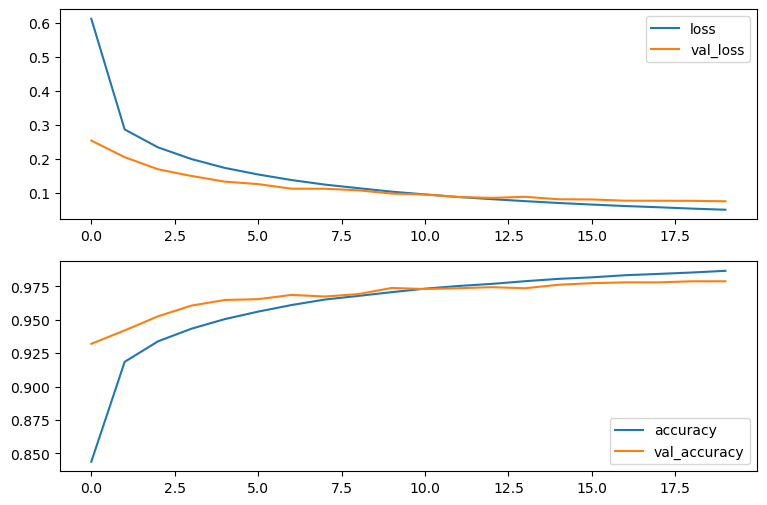

In [191]:
## Plot our history:
fig, ax1 = plt.subplots(2,1, figsize=(9,6))

df[['loss', 'val_loss']].plot(ax=ax1[0])
df[['accuracy', 'val_accuracy']].plot(ax=ax1[1])

In [67]:
## Note:
## Training error = average over epoch
## Validation error = computed at end of epoch

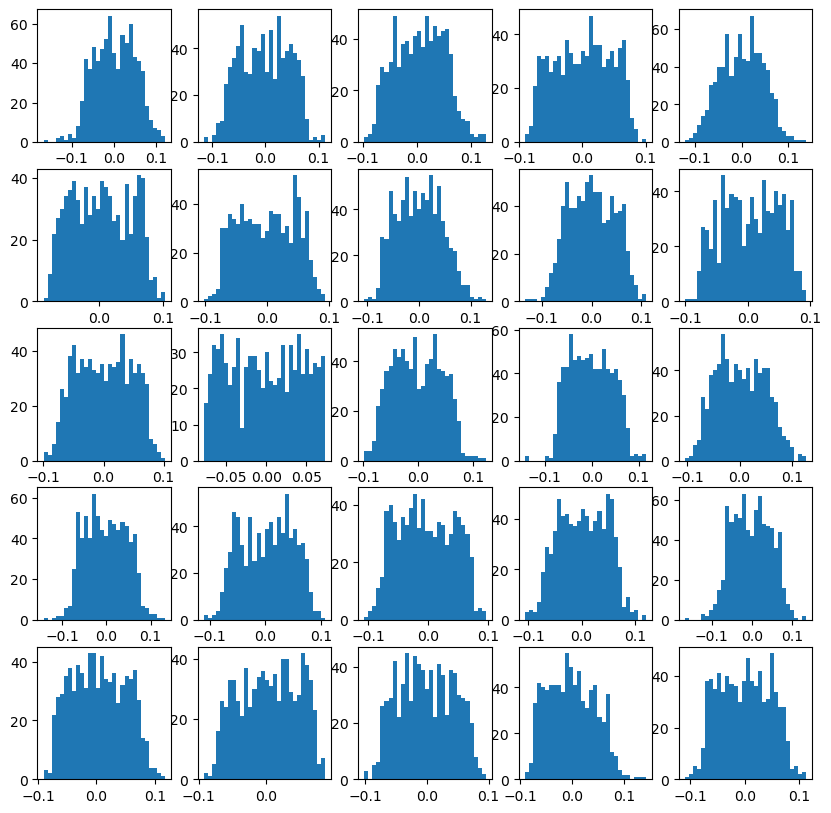

In [192]:
## What do weights look like now?
######

weights, biases = hidden1.get_weights()

fig1, ax1 = plt.subplots(5, 5, figsize=(10,10))
ax1 = ax1.flatten()

#Input weights for 25 neurons in the first hidden layer
for i in range(25):
    ax1[i].hist(weights[:,i], bins=30);

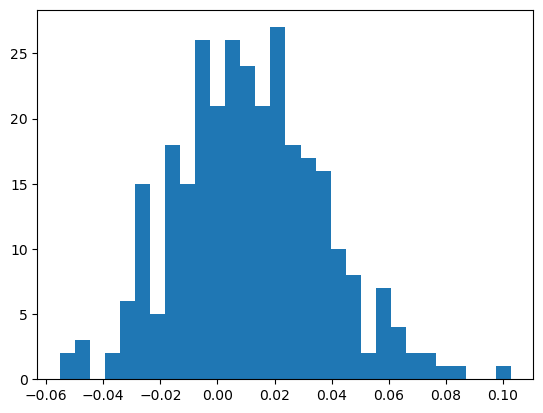

In [193]:
#Could also check the biases:
plt.hist(biases, bins=30);

### Apply model to Testing Data

- Can assess overall performance using loss function and any metrics with `evaluate()` method
- Can make predictions with `predict()`!

In [194]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 952us/step - loss: 0.0769 - accuracy: 0.9764


[0.07687288522720337, 0.9764000177383423]

In [195]:
## predict: Gives probabilities (similar to predict_proba in Scikit-Learn)
y_pred_proba = model.predict(X_test)

313/313 [==============================] - 0s 869us/step


In [196]:
#Look at the first few entries, rounded:
y_pred_proba[:3].round(3)

array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.998, 0.   ,
        0.   ],
       [0.   , 0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.995, 0.001, 0.   , 0.001, 0.   , 0.   , 0.003, 0.001,
        0.   ]], dtype=float32)

In [197]:
#To get the most likely class:
#Just our classical argmax
y_pred_proba.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

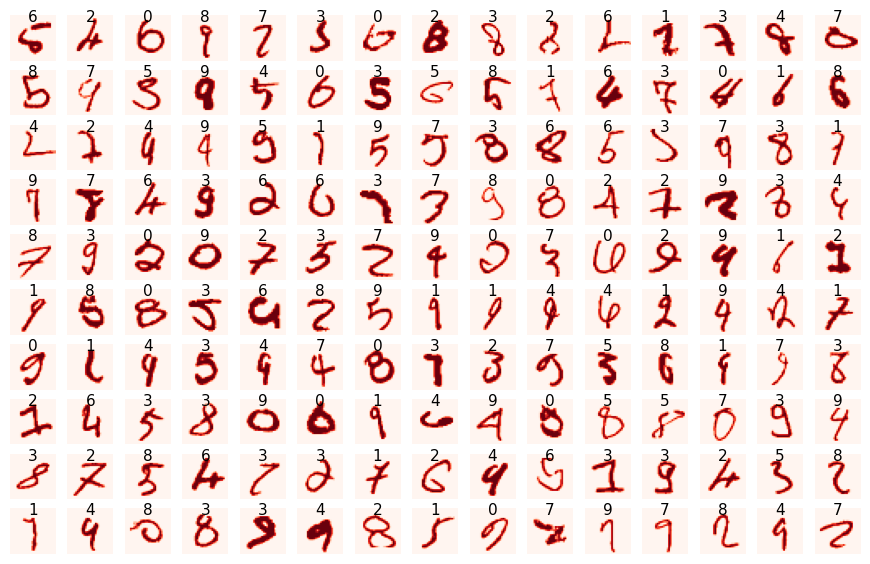

In [198]:
## Let's visualize our performance on the first few hundred test entries:
#######

### Let's display the first echelon of predictions...
#########
fig1, ax1 = plt.subplots(10, 15, figsize=(11,7))
ax1 = ax1.flatten()

y_pred = y_pred_proba.argmax(axis=1)

#And plot:
index = 0
for i in range(len(y_test)):

    ##Actually, only do incorrect:
    #####
    if (y_pred[i] == y_test[i]):
        continue
    
    #Color differently if correct vs. incorrect prediction:
    if (y_pred[i] == y_test[i]):
        my_cmap = 'Greens'
    else:
        my_cmap = 'Reds'
        #Add a title that is prediction in incorrect case:
        ax1[index].set_title(y_pred[i], fontsize=11, y=.675)
        
    #Plot the letter
    ax1[index].imshow(X_test[i], cmap=my_cmap)
    ax1[index].set_axis_off()
    index+=1

    if (index == 150):
        break

### Let's Examine Decision Surfaces

- Let's train a classifier and observe decision surface on moons data
- Keep training and see how it evolves

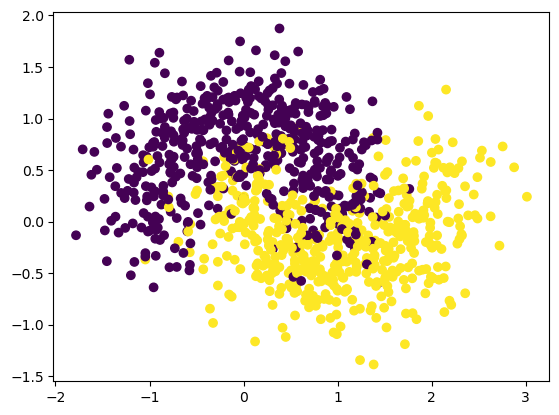

In [199]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=.35, random_state=42)

#Let's convert y to a float:
y = y.astype(np.float64)

plt.scatter(X[:,0], X[:,1], c=y)

In [200]:
#Again, build a model with the sequential AI:
tf.random.set_seed(42)

model_moons = tf.keras.Sequential()

#Now our input just has 2 dimensions:
model_moons.add(tf.keras.layers.InputLayer(input_shape=[2]))

#Let's add some hidden layers:
model_moons.add(tf.keras.layers.Dense(300, activation="relu"))
model_moons.add(tf.keras.layers.Dense(100, activation="relu"))
model_moons.add(tf.keras.layers.Dense(50, activation="relu"))

#Output layer will have 1 neurons for single classification:
#Activation function sigmoid!
#Recall this is what we use for logistic regression
model_moons.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [201]:
#Summary?
model_moons.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 300)               900       
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 36101 (141.02 KB)
Trainable params: 36101 (141.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [202]:
## Once again, we must compile: Define loss, optimizer, and any metrics to track
###########

#binary_crossentropy since we have a binary classification
#Switch to adam optimizer; add precision and recall
model_moons.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [203]:
## Run the fit multiple times with different numbers of epochs
#######

In [204]:
## And fit:
# Note we just use validation_split here
history = model_moons.fit(X, y, epochs=500, verbose=False,
          validation_split=.1)


In [205]:
pd.DataFrame(history.history).tail()

,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall
495,0.178868,0.921111,0.938497,0.903509,0.308005,0.86,0.812500,0.886364
496,0.180055,0.924444,0.934978,0.914474,0.307501,0.88,0.847826,0.886364
497,0.179139,0.922222,0.942661,0.901316,0.302331,0.88,0.847826,0.886364
498,0.182247,0.917778,0.915217,0.923246,0.316835,0.86,0.812500,0.886364
499,0.178857,0.928889,0.945455,0.912281,0.302224,0.90,0.886364,0.886364


<Axes: >

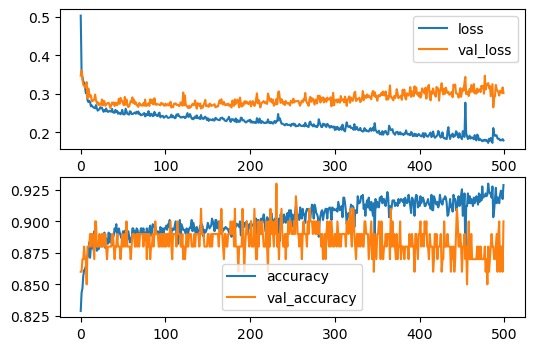

In [206]:
#Check our history:
df = pd.DataFrame(history.history)

## Plot our history:
fig, ax1 = plt.subplots(2,1, figsize=(6,4))

df[['loss', 'val_loss']].plot(ax=ax1[0])
df[['accuracy', 'val_accuracy']].plot(ax=ax1[1])

7813/7813 [==============================] - 5s 592us/step


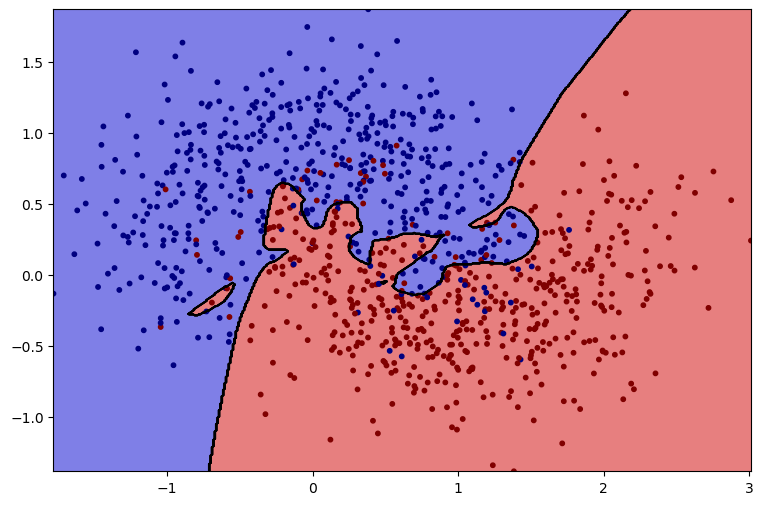

In [207]:
#Make a decision surface:
#######

fig, ax1 = plt.subplots(1,1, figsize=(9,6))

x1 = np.min(X[:,0]); x2 = np.max(X[:,0])
y1 = np.min(X[:,1]); y2 = np.max(X[:,1])

N = 500
X1, Y1 = np.meshgrid(np.linspace(x1, x2, N),
                         np.linspace(y1, y2, N))

#Get as Nx2:
XY_ravel = np.c_[X1.ravel(), Y1.ravel()]

y_pred_surface = model_moons.predict(XY_ravel)

#Make binary?
y_pred_surface = (y_pred_surface > 0.5).astype(int)


Z = y_pred_surface.reshape(X1.shape)


#Results?
#####

ax1.contourf(X1, Y1, Z, alpha=.5, cmap='jet')
ax1.contour(X1, Y1, Z, 10, alpha=1, linewidths=1, colors='black');

ax1.scatter(X[:,0], X[:,1], s=10, c=y, cmap='jet');

In [ ]:
## Add keep only best validation run?
####

## Logistic Regression and Multinomial Regression as Neural Nets?

Logistic regression is given as

$$
\ln{\frac{p}{1-p}} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n
$$

Or we could frame with weights and bias:

$$
\ln{\frac{p}{1-p}} = b + w_1 x_1 + w_2 x_2 + ... + w_n x_n = b + \mathbf{w}^T \mathbf{x}
$$

Rearranging gives:

$$
\hat{p} = \theta(b + \mathbf{w}^T \mathbf{x})
$$

where

$$
\theta(x) = \frac{1}{1 + e^{-x}}
$$

is the unit logistic/sigmoid function.

#### Thus, logistic regression is exactly the same as a 1-layer perceptron with a single output neuron and a sigmoid activation function!

In [84]:
## Let's compare Scikit-Learn's Logistic Regression to Keras Sequential Model:
#########

##Let's just use the same moons data above
##

#Again, build a model with the sequential AI:
tf.random.set_seed(42)

model_lr = tf.keras.Sequential()

#Now our input just has 2 dimensions:
model_lr.add(tf.keras.layers.InputLayer(input_shape=[2]))

#We only have input onto a single output neuron, with activation sigmoid:
model_lr.add(tf.keras.layers.Dense(1, activation="sigmoid"))

#That's it!
#Still gotta compile and fit though...

#kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)


In [85]:
model_lr.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
## Yet again, we compile: Define loss, optimizer, and any metrics to track
###########

#binary_crossentropy since we have a binary classification
#Let's just use sgd for optimizer, track accuracy
model_lr.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [87]:
##Fit, no validation set
model_lr.fit(X, y, epochs=1000, verbose=False)


In [88]:
weights, biases = model_lr.layers[0].get_weights()
weights

array([[ 1.3126981],
       [-3.3167367]], dtype=float32)

7813/7813 [==============================] - 4s 525us/step


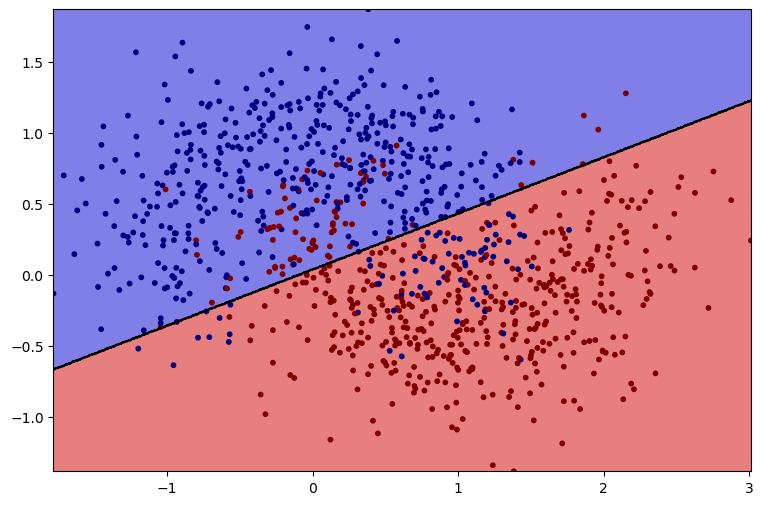

In [89]:
#Prediction surface once again?
#######

fig, ax1 = plt.subplots(1,1, figsize=(9,6))

x1 = np.min(X[:,0]); x2 = np.max(X[:,0])
y1 = np.min(X[:,1]); y2 = np.max(X[:,1])

N = 500
X1, Y1 = np.meshgrid(np.linspace(x1, x2, N),
                         np.linspace(y1, y2, N))

#Get as Nx2:
XY_ravel = np.c_[X1.ravel(), Y1.ravel()]

y_pred_surface = model_lr.predict(XY_ravel)

#Make binary?
y_pred_surface = (y_pred_surface > 0.5).astype(int)


Z = y_pred_surface.reshape(X1.shape)

#Plot
ax1.contourf(X1, Y1, Z, alpha=.5, cmap='jet')
ax1.contour(X1, Y1, Z, 10, alpha=1, linewidths=1, colors='black');

ax1.scatter(X[:,0], X[:,1], s=10, c=y, cmap='jet');

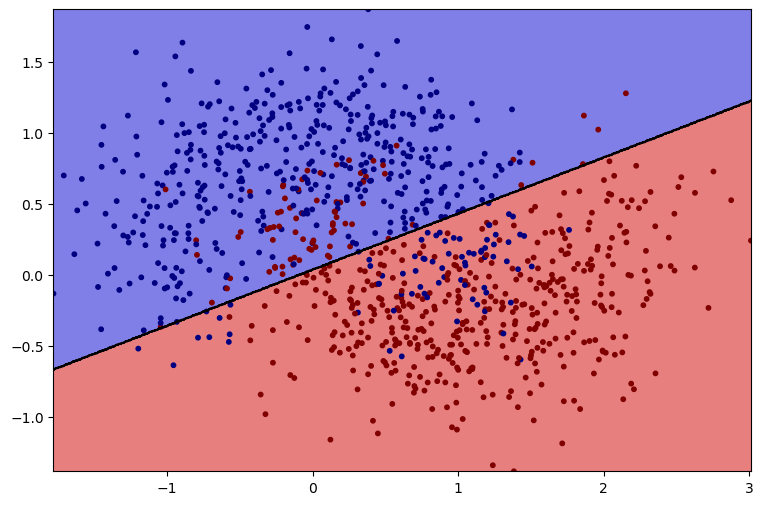

In [90]:
### Compare to Scikit-Learn?
########

#Logistic Regression
from sklearn.linear_model import LogisticRegression

#Make model:
#Set penalty = None for no regularization
sk_lr = LogisticRegression(penalty=None)

#And fit:
sk_lr.fit(X, y)


#Prediction surface once again?
#######

fig, ax1 = plt.subplots(1,1, figsize=(9,6))

x1 = np.min(X[:,0]); x2 = np.max(X[:,0])
y1 = np.min(X[:,1]); y2 = np.max(X[:,1])

N = 500
X1, Y1 = np.meshgrid(np.linspace(x1, x2, N),
                         np.linspace(y1, y2, N))

#Get as Nx2:
XY_ravel = np.c_[X1.ravel(), Y1.ravel()]

y_pred_surface = sk_lr.predict(XY_ravel)
Z = y_pred_surface.reshape(X1.shape)

#Plot
ax1.contourf(X1, Y1, Z, alpha=.5, cmap='jet')
ax1.contour(X1, Y1, Z, 10, alpha=1, linewidths=1, colors='black');

ax1.scatter(X[:,0], X[:,1], s=10, c=y, cmap='jet');

In [91]:
#Compare coefficients and intercept:
print(sk_lr.coef_)
print(sk_lr.intercept_)

[[ 1.31115475 -3.31620953]]
[0.12100556]


In [92]:
## Weights/Bias from above?
print(weights)
print(biases)

[[ 1.3126981]
 [-3.3167367]]
[0.12359317]


## Add a Hidden Layer...

Let's add a hidden layer to our Keras model and see what happens

In [101]:
#Make our model using the sequential API:
model = tf.keras.Sequential()

#Input has just 2 dimensions:
model.add(tf.keras.layers.InputLayer(input_shape=[2]))

#Now add a single hidden layer
model.add(tf.keras.layers.Dense(32, activation='relu'))

#And our single output neuron, with activation sigmoid:
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

#That's it!
#Still gotta compile and fit though...

#kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)


7813/7813 [==============================] - 4s 517us/step


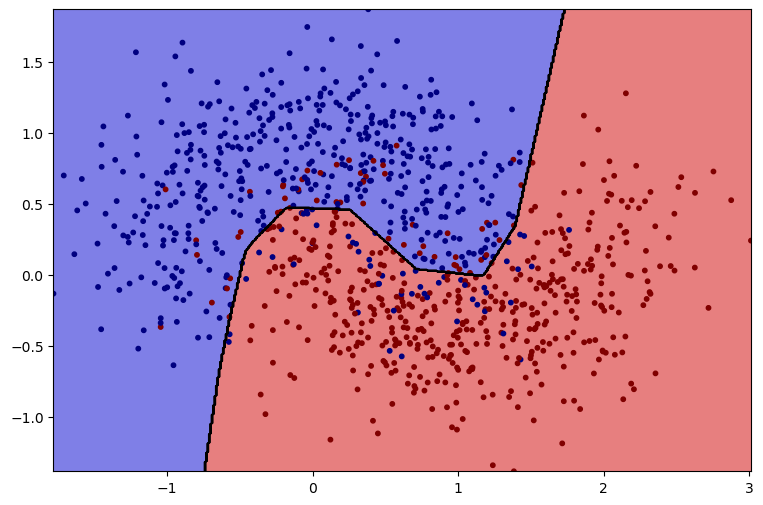

In [102]:
## Compile
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

##Fit, no validation set
model.fit(X, y, epochs=1000, verbose=False)


#Prediction surface once again
#######

fig, ax1 = plt.subplots(1,1, figsize=(9,6))

x1 = np.min(X[:,0]); x2 = np.max(X[:,0])
y1 = np.min(X[:,1]); y2 = np.max(X[:,1])

N = 500
X1, Y1 = np.meshgrid(np.linspace(x1, x2, N),
                         np.linspace(y1, y2, N))

#Get as Nx2:
XY_ravel = np.c_[X1.ravel(), Y1.ravel()]

y_pred_surface = model.predict(XY_ravel)

#Make binary?
y_pred_surface = (y_pred_surface > 0.5).astype(int)


Z = y_pred_surface.reshape(X1.shape)

#Plot
ax1.contourf(X1, Y1, Z, alpha=.5, cmap='jet')
ax1.contour(X1, Y1, Z, 10, alpha=1, linewidths=1, colors='black');

ax1.scatter(X[:,0], X[:,1], s=10, c=y, cmap='jet');

## And Multinomial Regression?

With multinomial regression we calculate a softmax score for each class $k$ as

$$
s_k(x) = (\theta^{(k)})^T x
$$

And our scores are computed by the softmax function:

$$
\hat{p}_k = \frac{\exp{(s_k(x))}}{\sum_{i=i}^k \exp{(s_i(x))}}
$$

The cost function is cross-entropy, as for logistic regression.

#### Thus, multinomial regression is exactly the same as a 1-layer perceptron with a as many output neurons as classes, and a softmax activation function!

- Train using cross entropy as loss, either `sparse_categorical_crossentropy` or `categorical_cross_entropy`

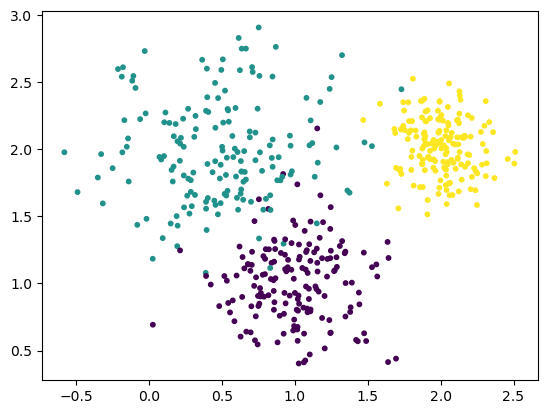

In [4]:
##Demo on blobs:

from sklearn.datasets import make_blobs

#Make three blobs and classify:
blob_centers = np.array([[1, 1], [.5, 2], [2, 2]])

blob_std = np.array([0.3, .4, .2])

#X and y:
#y is blob membership
X, y = make_blobs(n_samples=500, centers=blob_centers, cluster_std=blob_std,
                  random_state=42)

plt.scatter(X[:,0], X[:,1], s=10, c=y)

In [39]:
## Let's compare Scikit-Learn's Logistic Regression to Keras Sequential Model:
#########

#build a model with the sequential AI:
tf.random.set_seed(42)

model_multi = tf.keras.Sequential()

#Now our input again just has 2 dimensions:
model_multi.add(tf.keras.layers.InputLayer(input_shape=[2]))

#Make nonlinear with additional layers:
#model_multi.add(tf.keras.layers.Dense(10, activation="relu"))

#We only have input onto a single output neuron, with activation softmax:
model_multi.add(tf.keras.layers.Dense(3, activation="softmax"))

#That's all
#Still gotta compile and fit...


In [36]:
#sparse_categorical_crossentropy this time
#Let's just use sgd for optimizer, track accuracy
model_multi.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [37]:
##Fit, no validation set
model_multi.fit(X, y, epochs=1000, verbose=False)


2813/2813 [==============================] - 2s 543us/step


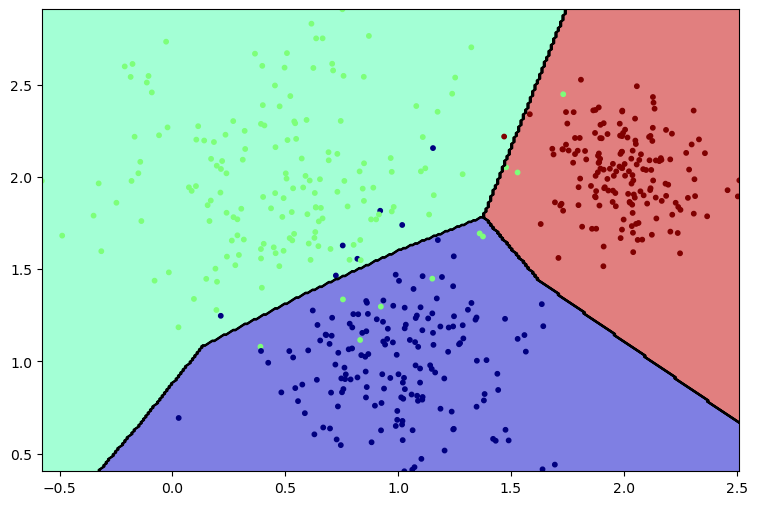

In [38]:
#Prediction surface once again?
#######

fig, ax1 = plt.subplots(1,1, figsize=(9,6))

x1 = np.min(X[:,0]); x2 = np.max(X[:,0])
y1 = np.min(X[:,1]); y2 = np.max(X[:,1])

N = 300
X1, Y1 = np.meshgrid(np.linspace(x1, x2, N),
                         np.linspace(y1, y2, N))

#Get as Nx2:
XY_ravel = np.c_[X1.ravel(), Y1.ravel()]

y_pred_surface = model_multi.predict(XY_ravel)

#Make binary? Use argmax
y_pred_surface = np.argmax(y_pred_surface, axis=1)

#Or take max probabilities?
#y_pred_surface = np.max(y_pred_surface, axis=1)


Z = y_pred_surface.reshape(X1.shape)

#Plot
ax1.contourf(X1, Y1, Z, alpha=.5, cmap='jet')
ax1.contour(X1, Y1, Z, 10, alpha=1, linewidths=1, colors='black');

ax1.scatter(X[:,0], X[:,1], s=10, c=y, cmap='jet');

### Finally, note demo:

http://playground.tensorflow.org
